In [1]:
import random
import requests
import csv

# Function to fetch weather data from OpenWeatherMap API
def get_weather_data(api_key, state):
    url = f"http://api.openweathermap.org/data/2.5/weather?q={state},NG&appid={api_key}&units=metric"
    response = requests.get(url)
    data = response.json()
    return data

# API key for OpenWeatherMap
api_key = "93a9996925a904b992b9c26c385610de"

# List of 10 random states in Nigeria
states = ["Lagos", "Abuja", "Kano", "Ogun", "Enugu", "Rivers", "Kaduna", "Oyo", "Edo", "Delta"]

# Open a CSV file to write the weather data
with open("weather_data.csv", "w", newline="") as file:
    writer = csv.writer(file)

    # Write the header row
    writer.writerow(["State", "Temperature (°C)", "Humidity (%)", "Description"])

    # Loop through the states and fetch weather data
    for state in states:
        try:
            # Fetch weather data using the API
            weather_data = get_weather_data(api_key, state)

            # Check if the response contains the necessary data
            if "main" in weather_data and "temp" in weather_data["main"]:
                # Extract relevant information from the weather data
                temperature = weather_data["main"]["temp"]
                humidity = weather_data["main"].get("humidity")
                description = weather_data["weather"][0].get("description")

                # Write the weather data row
                writer.writerow([state, temperature, humidity, description])

        except requests.exceptions.RequestException as e:
            print(f"Error occurred while fetching weather data for {state}: {e}")

# Print a success message
print("Weather data successfully fetched and saved to weather_data.csv.")

Weather data successfully fetched and saved to weather_data.csv.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('weather_data.csv', encoding='latin-1')
df.head()

,State,Temperature (°C),Humidity (%),Description
0,Lagos,31.18,74,light rain
1,Abuja,28.08,72,moderate rain
2,Kano,35.94,38,clear sky
3,Ogun,30.06,50,light rain
4,Enugu,23.66,88,thunderstorm with light rain


In [4]:
df.isnull().sum()

State               0
Temperature (°C)    0
Humidity (%)        0
Description         0
dtype: int64

# Explanatory Data Analysis

       Temperature (°C)  Humidity (%)
count          9.000000      9.000000
mean          30.380000     63.777778
std            3.901887     19.556187
min           23.660000     34.000000
25%           28.580000     50.000000
50%           30.060000     72.000000
75%           31.180000     80.000000
max           36.200000     88.000000


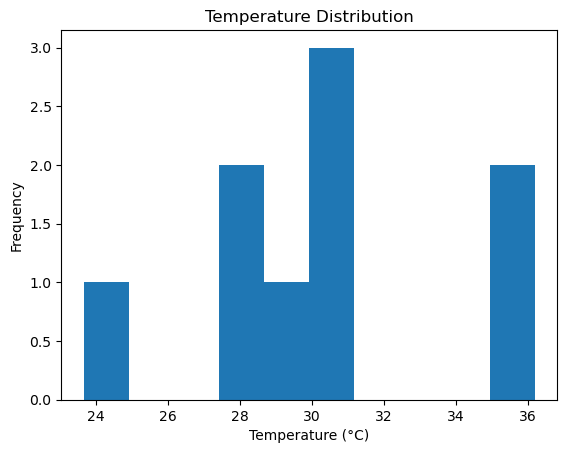

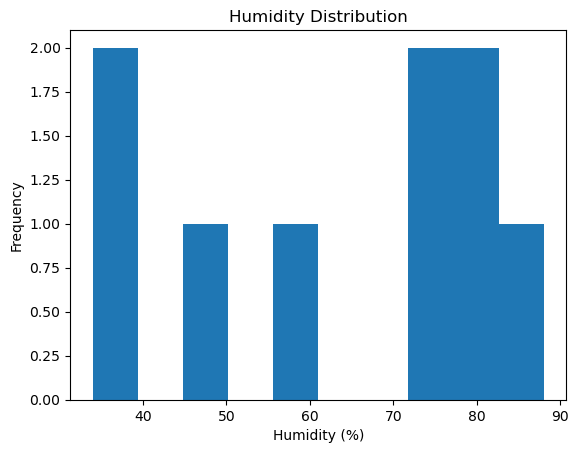

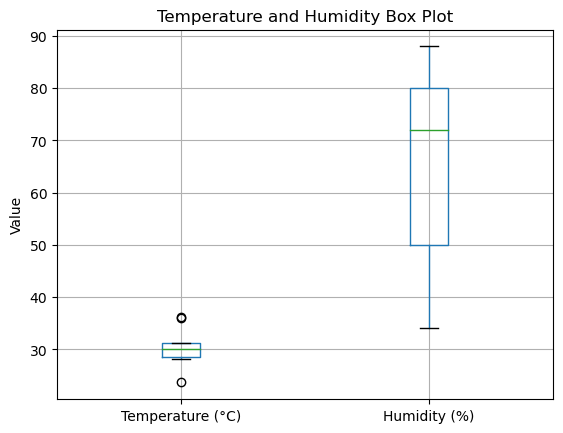

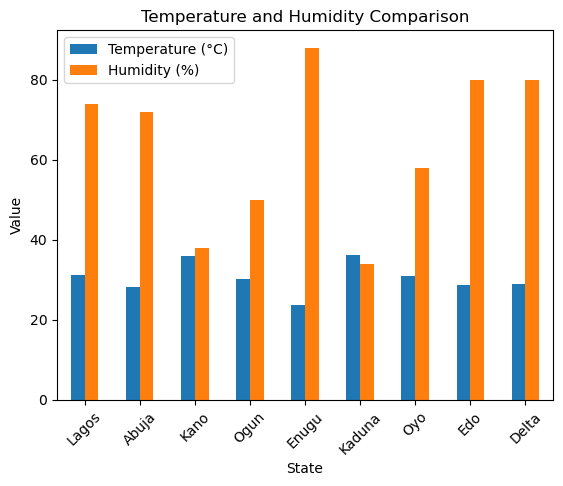

Correlation between Temperature and Humidity: -0.8888221880330264


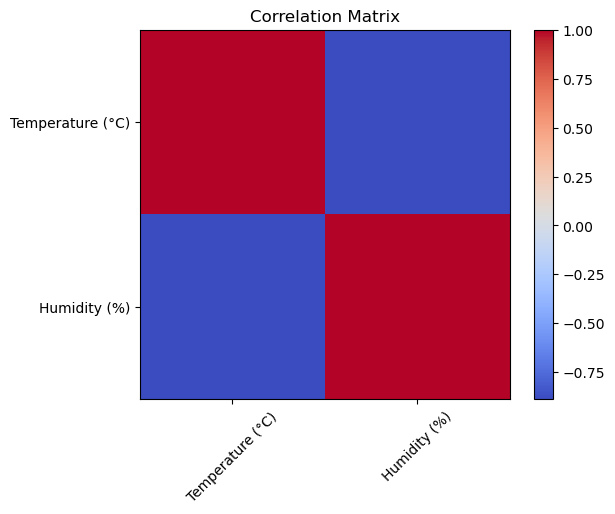

In [5]:
# Display the statistical summary of the data
summary = df.describe()
print(summary)

# Plot histograms of temperature and humidity
df['Temperature (°C)'].plot(kind='hist', bins=10)
plt.xlabel('Temperature (°C)')
plt.ylabel('Frequency')
plt.title('Temperature Distribution')
plt.show()

df['Humidity (%)'].plot(kind='hist', bins=10)
plt.xlabel('Humidity (%)')
plt.ylabel('Frequency')
plt.title('Humidity Distribution')
plt.show()

# Create a box plot of temperature and humidity
df.boxplot(column=['Temperature (°C)', 'Humidity (%)'])
plt.ylabel('Value')
plt.title('Temperature and Humidity Box Plot')
plt.show()

# Compare temperature and humidity across different states using bar charts
df.plot(x='State', y=['Temperature (°C)', 'Humidity (%)'], kind='bar')
plt.xlabel('State')
plt.ylabel('Value')
plt.title('Temperature and Humidity Comparison')
plt.legend(['Temperature (°C)', 'Humidity (%)'])
plt.xticks(rotation=45)
plt.show()

# Calculate the correlation between temperature and humidity
correlation = df['Temperature (°C)'].corr(df['Humidity (%)'])
print("Correlation between Temperature and Humidity:", correlation)

# Visualize the correlation using a heatmap
corr_matrix = df[['Temperature (°C)', 'Humidity (%)']].corr()
plt.imshow(corr_matrix, cmap='coolwarm', interpolation='nearest')
plt.colorbar()
plt.xticks(range(corr_matrix.shape[1]), corr_matrix.columns, rotation=45)
plt.yticks(range(corr_matrix.shape[1]), corr_matrix.columns)
plt.title('Correlation Matrix')
plt.show()

In [6]:
df

,State,Temperature (°C),Humidity (%),Description
0,Lagos,31.18,74,light rain
1,Abuja,28.08,72,moderate rain
2,Kano,35.94,38,clear sky
3,Ogun,30.06,50,light rain
4,Enugu,23.66,88,thunderstorm with light rain
5,Kaduna,36.20,34,broken clouds
6,Oyo,30.87,58,overcast clouds
7,Edo,28.58,80,light rain
8,Delta,28.85,80,moderate rain


# Time Series Analysis

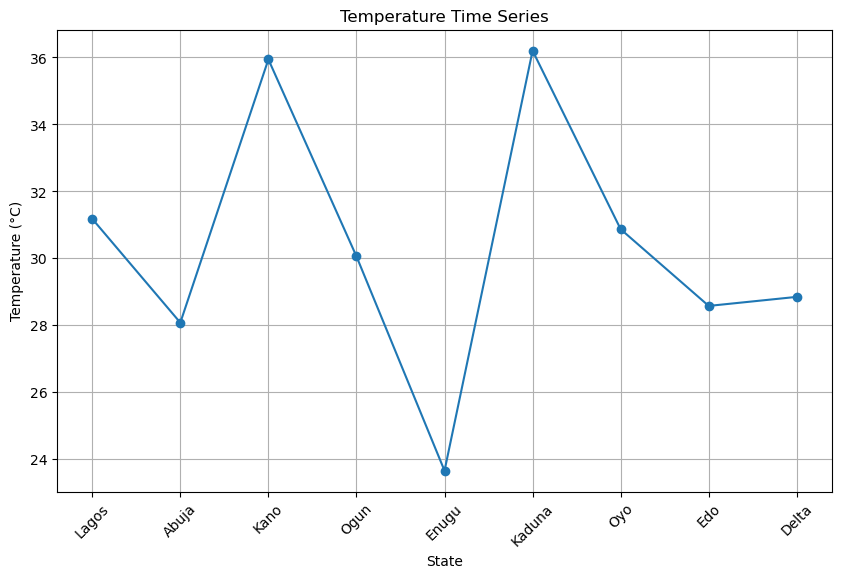

In [8]:
# Time Series Analysis

# Create a DataFrame with the temperature data
data = {
    'State': ['Lagos', 'Abuja', 'Kano', 'Ogun', 'Enugu', 'Kaduna', 'Oyo', 'Edo', 'Delta'],
    'Temperature': [31.18, 28.08, 35.94, 30.06, 23.66, 36.20, 30.87, 28.58, 28.85]
}
df = pd.DataFrame(data)

# Convert the 'State' column to categorical for proper ordering
df['State'] = pd.Categorical(df['State'], categories=df['State'].unique(), ordered=True)

# Sort the DataFrame by the 'State' column
df.sort_values('State', inplace=True)

# Plot the time series of temperature
plt.figure(figsize=(10, 6))
plt.plot(df['State'], df['Temperature'], marker='o')
plt.xlabel('State')
plt.ylabel('Temperature (°C)')
plt.title('Temperature Time Series')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Seasonal Analysis

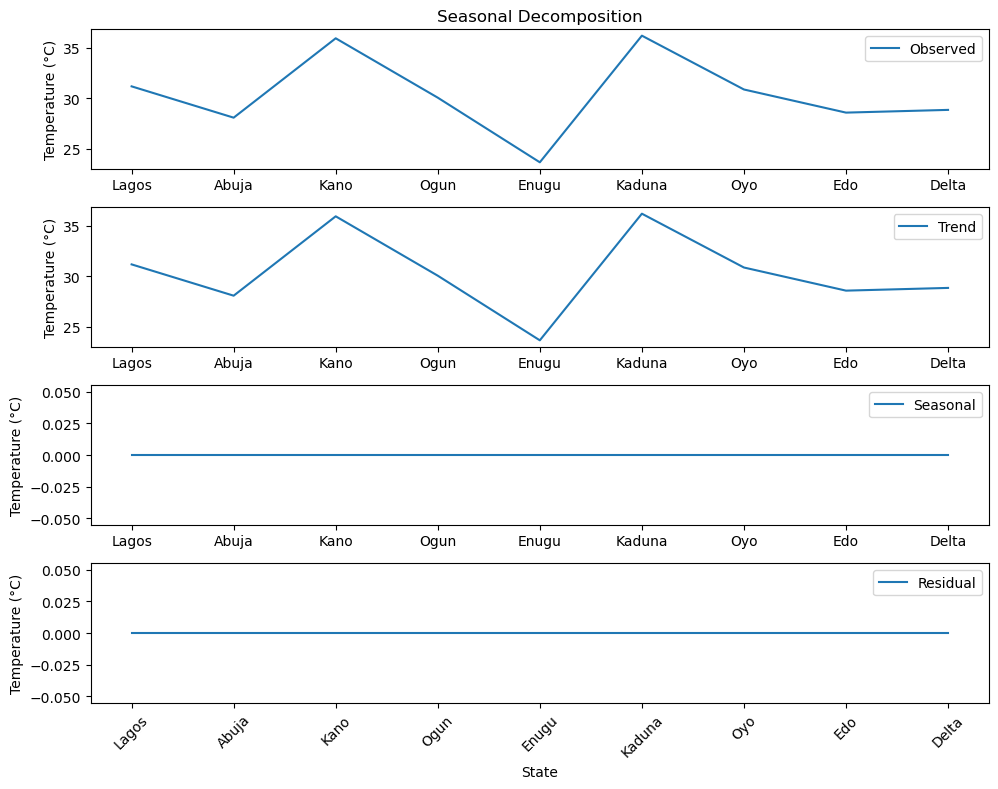

In [9]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Create a DataFrame with the temperature data
data = {
    'State': ['Lagos', 'Abuja', 'Kano', 'Ogun', 'Enugu', 'Kaduna', 'Oyo', 'Edo', 'Delta'],
    'Temperature': [31.18, 28.08, 35.94, 30.06, 23.66, 36.20, 30.87, 28.58, 28.85]
}
df = pd.DataFrame(data)

# Convert the 'State' column to categorical for proper ordering
df['State'] = pd.Categorical(df['State'], categories=df['State'].unique(), ordered=True)

# Sort the DataFrame by the 'State' column
df.sort_values('State', inplace=True)

# Perform seasonal decomposition
result = seasonal_decompose(df['Temperature'], model='additive', period=1)  # Assuming non-seasonal data

# Plot the decomposition components
plt.figure(figsize=(10, 8))
plt.subplot(411)
plt.plot(df['State'], result.observed, label='Observed')
plt.ylabel('Temperature (°C)')
plt.title('Seasonal Decomposition')
plt.legend()

plt.subplot(412)
plt.plot(df['State'], result.trend, label='Trend')
plt.ylabel('Temperature (°C)')
plt.legend()

plt.subplot(413)
plt.plot(df['State'], result.seasonal, label='Seasonal')
plt.ylabel('Temperature (°C)')
plt.legend()

plt.subplot(414)
plt.plot(df['State'], result.resid, label='Residual')
plt.xlabel('State')
plt.ylabel('Temperature (°C)')
plt.legend()

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Outlier Detection

In [10]:
# Create a DataFrame with the temperature data
data = {
    'State': ['Lagos', 'Abuja', 'Kano', 'Ogun', 'Enugu', 'Kaduna', 'Oyo', 'Edo', 'Delta'],
    'Temperature': [31.18, 28.08, 35.94, 30.06, 23.66, 36.20, 30.87, 28.58, 28.85]
}
df = pd.DataFrame(data)

# Calculate the z-score for each temperature value
df['Z_Score'] = (df['Temperature'] - df['Temperature'].mean()) / df['Temperature'].std()

# Set a threshold for outlier detection (e.g., z-score > 3 or < -3)
threshold = 3

# Identify outliers based on the z-score
outliers = df[abs(df['Z_Score']) > threshold]

# Print the outliers
print("Outliers:")
print(outliers)

# Remove outliers from the DataFrame
df = df[abs(df['Z_Score']) <= threshold]

# Print the filtered DataFrame without outliers
print("Filtered Data:")
print(df)

Outliers:
Empty DataFrame
Columns: [State, Temperature, Z_Score]
Index: []
Filtered Data:
    State  Temperature   Z_Score
0   Lagos        31.18  0.205029
1   Abuja        28.08 -0.589458
2    Kano        35.94  1.424951
3    Ogun        30.06 -0.082012
4   Enugu        23.66 -1.722243
5  Kaduna        36.20  1.491586
6     Oyo        30.87  0.125580
7     Edo        28.58 -0.461315
8   Delta        28.85 -0.392118


# Geographic Visualization

In [12]:
pip install folium

     ------------------------------------ 102.3/102.3 kB 453.4 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [13]:
import folium
import pandas as pd

# Create a DataFrame with the state names and their corresponding latitude and longitude coordinates
data = {
    'State': ['Lagos', 'Abuja', 'Kano', 'Ogun', 'Enugu', 'Kaduna', 'Oyo', 'Edo', 'Delta'],
    'Latitude': [6.5244, 9.0579, 12.0022, 7.1557, 6.4483, 10.5953, 7.3775, 6.3426, 5.839],
    'Longitude': [3.3792, 7.4951, 8.5921, 3.3470, 7.5293, 7.4323, 3.8964, 5.6204, 5.6764]
}
df = pd.DataFrame(data)

# Create a map centered around Nigeria
map_nigeria = folium.Map(location=[9.082, 8.6753], zoom_start=6)

# Add markers for each state
for index, row in df.iterrows():
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=row['State'],
        icon=folium.Icon(color='blue', icon='info-sign')
    ).add_to(map_nigeria)

# Display the map
map_nigeria

# Data Comparison

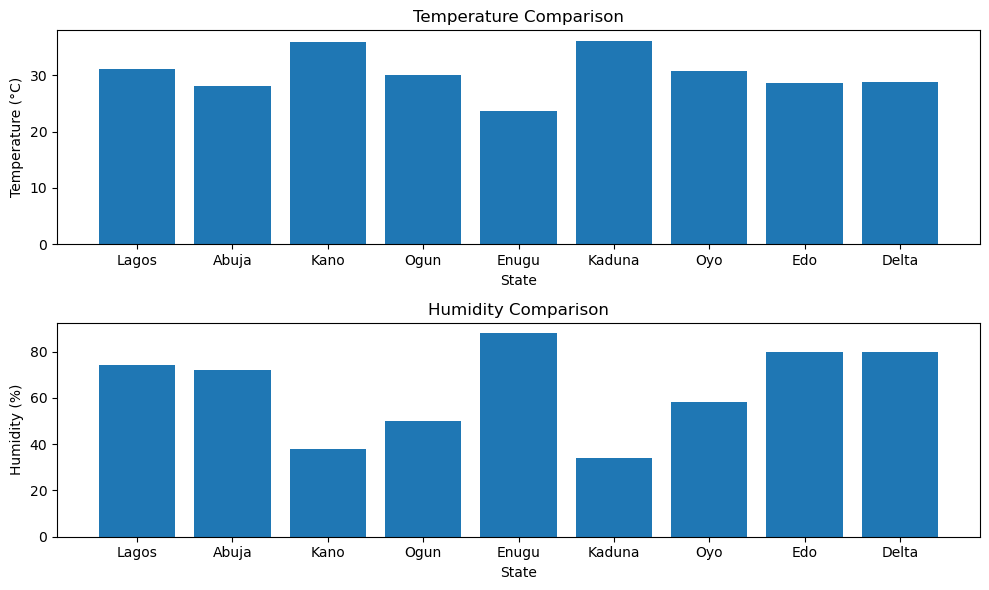

In [14]:
# Create a DataFrame with the state names and their corresponding temperature and humidity values
data = {
    'State': ['Lagos', 'Abuja', 'Kano', 'Ogun', 'Enugu', 'Kaduna', 'Oyo', 'Edo', 'Delta'],
    'Temperature (°C)': [31.18, 28.08, 35.94, 30.06, 23.66, 36.20, 30.87, 28.58, 28.85],
    'Humidity (%)': [74, 72, 38, 50, 88, 34, 58, 80, 80]
}
df = pd.DataFrame(data)

# Create bar charts for temperature and humidity
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.bar(df['State'], df['Temperature (°C)'])
plt.xlabel('State')
plt.ylabel('Temperature (°C)')
plt.title('Temperature Comparison')

plt.subplot(2, 1, 2)
plt.bar(df['State'], df['Humidity (%)'])
plt.xlabel('State')
plt.ylabel('Humidity (%)')
plt.title('Humidity Comparison')

plt.tight_layout()
plt.show()